In [405]:
import numpy as np
import pandas as pd
import linecache
import ctypes

In [406]:
class Newnode :
    def __init__(self):
        self.key = -1 
        self.concept =" "
        self.neigh = []
        self.relation_w_n = []
        self.skills = []

In [407]:
def createnode(key,concept,skills,neighbours,relations):
    node = Newnode()
    node.key = key
    node.concept = concept
    node.neigh = neighbours
    node.skills = skills
    node.relation_w_n = relations
    return node

In [408]:
def update(key,key_node,relatives,relations):
    for i in range(len(relatives)):
        key_node[relatives[i]].neigh.append(key)
        key_node[relatives[i]].relation_w_n.append(-relations[i])

In [409]:
def printnode(n):
    #l = open("output.txt",'r').readlines()
    #node_printing = l[n+1].split()
    print("The concept is ",key_node[n].concept)
    neighbours = []
    for i in range(len(key_node[n].neigh)) :
        neighbours.append(key_node[key_node[n].neigh[i]].concept)
    print("The neighbours are " + str(neighbours))
    relations = []
    for i in range(len(key_node[n].relation_w_n)) :
        relations.append(key_node[n].relation_w_n[i])
    print("The relation with neighnours are " + str(relations))
    print("The skills of this concept is "+ str(key_node[n].skills))

In [410]:
def deletenode(n,key_node,all_relations_for_graph,G):
    G.remove_node(n)
    all_relations_for_graph = G.edges()
    key_node[n]="Deleted"
    lines = open("output.txt",'r').readlines()
    lines[n-1] = str(n) + " Deleted\n" 
    out = open("output.txt",'w')
    out.writelines(lines)
    out.close()
    return key_node, all_relations_for_graph, G

In [411]:
def editnode(n,concept,skills,neighbours,relations,G,H,all_relations_for_graph):
    key_node[n].concept = concept
    key_node[n].skills = skills
    key_node[n].neigh = neighbours
    key_node[n].relations_w_n = relations
    G.remove_node(n)
    H.add_node(n)
    H.add_nodes_from(G.nodes())
    H.add_edges_from(G.edges())
    a = []
    for i in range(len(neighbours)):
        a.append((n,neighbours[i]))
    H.add_edges_from(a)
    del G
    return H,all_relations_for_graph

In [412]:
def bfs_traversal(G,root) :
    edges = nx.bfs_edges(G, root)
    nodes = [root] + [v for u, v in edges]
    return nodes


In [413]:
def get_levels(key_node):
    levels= {}
    levels[1] = 1
    for a in range(2,len(key_node)):
        b = key_node[a].relation_w_n[0]
        c = key_node[a].neigh[0]
        if(b==1):
            levels[a] = levels[c] + 1
        if(b==0):
            levels[a]=levels[c]
    return levels

In [414]:
def get_paths_util(u, d, visited, path,final_paths):
    visited[u]=True
    path.append(u)
    lines = open("output.txt",'r').readlines()
    u_node = (ctypes.cast(int(lines[u-1][2:-1]), ctypes.py_object).value)
    d_node=(ctypes.cast(int(lines[d-1][2:-1]), ctypes.py_object).value)
    if(u == d):
        #print(path)
        final_paths.append(np.array(path.copy()))
        path.pop()
        visited[u]=False
        return final_paths
        
    else :
        for i in u_node.neigh:
            #print(i)
            if(visited[i]==False) :
                final_paths = get_paths_util(i,d,visited,path,final_paths)
    path.pop()
    visited[u]=False
    return final_paths


In [415]:
def get_paths(s,d):
    lines = open("output.txt",'r').readlines()
    s_node = (ctypes.cast(int(lines[s-1][2:-1]), ctypes.py_object).value)
    d_node =(ctypes.cast(int(lines[d-1][2:-1]), ctypes.py_object).value)
    visited = [False]*(len(lines)+1)
    path = []
    final_paths = []
    final_paths = get_paths_util(s,d,visited,path,final_paths)
    return np.array(final_paths)

In [416]:
def get_shortest_path_util(path,student_ability,threshold):
    i = path[0]
    result = []
    difficulty = 0
    student_ability = np.array(student_ability)
    for j in path[1:-1]:
        lines = open("output.txt",'r').readlines()
        j_node_skills = np.array((ctypes.cast(int(lines[j-1][2:-1]), ctypes.py_object).value).skills)
        difference = np.sum(j_node_skills-student_ability)
        if(difference>threshold):
            result.append(j)
            difficulty = difference+difficulty
            student_ability = student_ability + 0.5*np.multiply(((student_ability-j_node_skills)>0),j_node_skills)
    result.append(path[len(path)-1])
    return result,difficulty

In [417]:
out_file = open("output.txt",'a+')
concept_data= open("Concepts_data.txt","r")
lines  = concept_data.readlines()
lines=[x.strip() for x in lines]
key_node = {}
all_relations_for_graph = []

In [418]:
#taking input from concepts file 
for i in range(int(len(lines)/5)) :
    key = int(lines[5*i])
    concept = lines[5*i+1]
    skills = lines[5*i+2].split()
    neigh = lines[5*i+3].split()
    relation = lines[5*i+4].split()
    s = []
    n = []
    r = []
    for j in range(len(skills)) :
        s.append(float(skills[j]))
    if(neigh[0]!="-"):
        for j in range(len(neigh)):
            n.append(int(neigh[j]))
            r.append(int(relation[j]))
            all_relations_for_graph.append((key,int(neigh[j])))
    node = createnode(key,concept,s,n,r)
    key_node[key] = node
    update(key,key_node,n,r)

In [419]:
#key_node

In [420]:
def getkeys_asarray(dict):
    return [*dict]
a = getkeys_asarray(key_node)


In [421]:
for i in range(len(a)):
    out_file.write(str(a[i])+" "+str(id(key_node[a[i]]))+"\n")
out_file.close()

In [422]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()

In [423]:
relations = np.array(all_relations_for_graph)

In [424]:
relations.shape[1]

2

In [425]:
relations

array([[ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  2],
       [ 5,  3],
       [ 6,  2],
       [ 7,  4],
       [ 8,  5],
       [ 8,  7],
       [ 9,  6],
       [ 9,  5],
       [ 9,  7],
       [10,  7],
       [11,  8],
       [11,  9],
       [12,  8],
       [12, 10],
       [13,  9],
       [14, 11],
       [14, 12],
       [14, 13],
       [15, 11],
       [15, 12],
       [16, 12],
       [17, 11],
       [17, 13],
       [18, 17],
       [19, 17],
       [19, 14],
       [19, 15],
       [20, 15],
       [20, 16],
       [21, 19],
       [21, 20]])

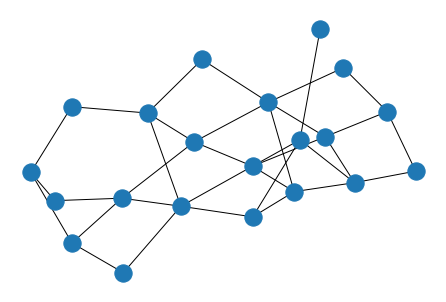

In [426]:
# adding just one node:
G.add_node(1)
# a list of nodes:
G.add_nodes_from(key_node.keys())
G.add_edges_from(all_relations_for_graph)
nx.draw(G)

In [427]:
#using printnode
printnode(21)

The concept is  Problem on KM
The neighbours are ['Defining centimeter', 'Defining KiloMeter']
The relation with neighnours are [1, 1]
The skills of this concept is [0.5, 0.2, 0.3, 0.4]


In [428]:
lo_with_concept = np.random.randint(1,21,size=11)

In [429]:
def get_prob(theta,a,b,c):
    prob = c + (1-c)/(1 + np.exp(np.dot(a,b) - np.dot(a,theta)))
    return prob
    

In [430]:
def get_asc(key):
    n = relations.shape[0] - 1
    key = np.array([key])
    while(n >= 0):
        if(relations[n,0] in key):
            if(not(relations[n,1] in key)) : key = np.append(key,relations[n,1])
        n = n-1 
    if(len(key)==0):
        return NULL
    key = key[1:]
    return key


In [431]:
def get_P_value(s_id,arr,a,b,c):
    p = []
    for i in arr:
        p.append(get_prob(int(theta[s_id-1]),a[i-1],b[i-1],c[s_id,i-1]))
    return np.array(p)
        

In [432]:
def get_good_ascendants(asc,s_res):
    size = asc.shape[0]
    final = []
    while(size>0) :
        out = np.array(get_asc(asc[size-1]))
        size1 = out.shape[0]
        if(size1 == 0) : 
            final.append(asc[size-1]) 
            size-=1   
            continue
        if not(out[size1-1] in np.array(final)) : final.append(out[0])
        while(size1>0):
            if(s_res[out[size1-1]] == 0):
                break
            if(size1==1):
                final.append(asc[size-1])
            size1 = size1 - 1
        size = size-1
    return final

In [433]:
data = pd.read_excel("data.xlsx")   # getting the response of 35 students for 35 items
difficulty = 1/(data.sum(0) + 1)   # data.sum gives the number of students attempted correctly each question

In [434]:
#defining the probability parameters
k = 10               # for number of interactions in step 7
n_students  = 35
n_items = 20
last_interaction  = 21
a_differ = np.random.rand(n_items+1)    #this parameters depends on how an item can differentiate bw student's ability
b_difficulty = difficulty[0:n_items+1]       #this parameter depends on the difficulty of the item
c_guess = np.random.rand(n_students,n_items+1)/2     #this is an array containing guess probability of each student for each item
theta = (np.random.rand(n_students,1)*8 - 4)  #taking theta(student ability) from -4 to 4 

In [435]:
#for student 1 setting student Id
s = 1
#step 3  - take all first attemps in order (taking first 20 exercises)(for student s = 1)
s_response = np.array(data)[s-1][0:20]

In [436]:
#step 4  - next student attempt is taken
next_attempt = np.array(data)[0][20]
#step 5
if(next_attempt == 1):
    proof = get_asc(21)
    print("As the student have correctly solved an instance of item no. 21 so he knows the concept to solve at least an instance of all the ascendants of this item, all its ascendants are " + str(proof))


As the student have correctly solved an instance of item no. 21 so he knows the concept to solve at least an instance of all the ascendants of this item, all its ascendants are [20 19 16 15 14 17 13 11 12  9 10  8  7  5  6  4  2  3  1]


In [437]:
#step 7 , taking one-last interaction
u  = s_response[s_response.shape[0]-k:s_response.shape[0]]
u_no = []
for i in range(s_response.shape[0]-k+1,s_response.shape[0]+1):
    u_no.append(i)
u_no= np.array(u_no)
response  = np.array(data)[s-1][last_interaction-1]
#step 8 and 9
if response == 1 :
    u = np.append(u,1)
    u = u[u.shape[0]-k:u.shape[0]]
    u_no = np.append(u_no,last_interaction)
    u_no = u_no[u_no.shape[0]-k:u_no.shape[0]]
else :
    ascendants = get_asc(last_interaction)
    a = 1 
    for i in ascendants :
        if(s_response[i-1]==0): a = 0 
    if(a==1) :
        u = np.append(u,s_response[last_interaction-1])
        u = u[1:]
        print(last_interaction)
        u_no = np.append(u_no,last_interaction)
        u_no = u_no[1:]
    else :
        good_asc = get_good_ascendants(ascendants,s_response)
        h1 = 0 
        for i in good_asc :
            if(h1<i): h1 = i
        u = np.append(u,s_response[h1-1])
        u = u[1:]
        print(h1)
        u_no = np.append(u_no,h1)
        u_no = u_no[1:]

In [438]:
#step 10
theta_new = 1
h2 = 0
for i in u_no:
    p = get_prob(int(theta[s-1]),a_differ[i-1],b_difficulty[i-1],c_guess[s][i-1])
    q = 1-p
    theta_new = theta_new*pow(p,u[h2])*pow(q,1-u[h2])
    h2+=1
    k-=1

In [439]:
theta_new

0.0017985088249243457

In [440]:
#part two adaptive exercises - starts here

In [441]:
p_threshold = 0.8  # this is the threshold closer to which the exercise will be suggested
neg_threshold = 0.2 #negative stop condition
pos_threshold = 0.98 #positive stop condition

In [442]:
prob_exercises = get_P_value(s,get_asc(21),a_differ,b_difficulty, c_guess)

In [443]:
B = np.zeros([n_items,1])   #initially all the items are unblocked
B_exercises = prob_exercises #as initially blocking prob is same as p(ij)

In [444]:
#this function blocks all the descendant exercises of n
def block_dec(relations,B,n):
    B[n] = 0
    for i in relations:
        if(i[1]==n):
            if(i[0]>=B.shape[0]):
                break
            B[i[0]] = 1
            B = block_dec(relations,B,i[0])
    return B

In [445]:
#this function unblocks the just below layer of n
def unblock_dec(relations,B,n):
    B[n] = 1
    for i in relations:
        if(i[1]==n):
            if(i[0]>=B.shape[0]):
                break
            B[i[0]] = 0
    return B

In [446]:
def get_exercise(B_exercises,p_t,neg_t,pos_t,B):
    e = -1
    for p in range(np.shape(B_exercises)[0]):
        if(B_exercises[p]>neg_t and B_exercises[p]<pos_t):
            if(e == -1) :
                if(B[p]==0) : e = p
            else:
                if(B[p]==0):
                    if(abs(B_exercises[e]-p_t)>abs(B_exercises[p]-p_t)):
                        e = p
    return e

In [447]:
exercise_no = get_exercise(B_exercises,p_threshold,neg_threshold, pos_threshold,B)
print("Suggested exercise ",exercise_no)
store = -1
while(exercise_no!=-1):
    if(store!=-1):
        B[store] = 0             #this store variable is used to ensure that the same suggestion is not repeated continuosly 
    solved = np.random.randint(2) # whether the suggested exercise has been solved by the user (to be taken as input)
    if(solved):
        B[exercise_no] = -1
        B = unblock_dec(relations,B,exercise_no)
        B_exercises[exercise_no] = 0
    else:
        B_exercises[exercise_no] = B_exercises[exercise_no]  + prob_exercises[exercise_no]*(1-B_exercises[exercise_no])
        if(B_exercises[exercise_no]>pos_threshold or B_exercises[exercise_no]<neg_threshold):
            B[exercise_no] = 1
            B = block_dec(relations,B,exercise_no)
        else: 
            store = exercise_no
            B[store] = -1
    exercise_no = get_exercise(B_exercises,p_threshold,neg_threshold, pos_threshold,B)
    print("Suggested exercise ",exercise_no)

Suggested exercise  18
Suggested exercise  3
Suggested exercise  1
Suggested exercise  6
Suggested exercise  13
Suggested exercise  9
Suggested exercise  15
Suggested exercise  4
Suggested exercise  5
Suggested exercise  10
Suggested exercise  14
Suggested exercise  0
Suggested exercise  8
Suggested exercise  2
Suggested exercise  11
Suggested exercise  10
Suggested exercise  11
Suggested exercise  12
Suggested exercise  17
Suggested exercise  3
Suggested exercise  17
Suggested exercise  6
Suggested exercise  4
Suggested exercise  16
Suggested exercise  7
Suggested exercise  -1
